# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## Your model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [52]:
##### Your Code Here #####

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# set pandas view options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# Assignment Plan

Since this dataset is quite large and complicated, I'm going to approach it using the below roadmap:

- clean data
- plot a log transformed y variable
- encode catgorical variables 
- create two polynomial features
- create an ineraction feature
- add additional features

# scratch notes
df = pd.io.parsers.read_csv(url, dtype={'MSSubClass': pd.Categorical,
                               'MSZoning' : pd.Categorical,
                               'Street' : pd.Categorical,
                               'Alley': pd.Categorical,
                                'LotShape': pd.Categorical,
                                'LandContour': pd.Categorical,
                                'Utilities': pd.Categorical,
                                'LotConfig': pd.Categorical,
                                'LandSlope': pd.Categorical,
                                'Neighborhood': pd.Categorical})
print(df.head().T)

In [53]:
# first we load data and look at the dtypes, etc

url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'
df = pd.read_csv(url)
print(df.shape)
df.describe()


(1460, 81)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [54]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [55]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [56]:
df.isna().sum()
# looks like we have some clear encoding problems, I will attemt to clean

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

# Clean Data

In [58]:


# drop columns that seem unimportant and NaNy

dfc = df.drop(['BsmtQual', 'BsmtCond', 
              'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
             'FireplaceQu', 'GarageType', 'GarageYrBlt','GarageFinish',
             'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Id'], axis=1)

# fill with 0s because these categories probably mean 0 instead of nan
dfc['LotFrontage'] = df['LotFrontage'].fillna(0)
dfc['Alley'] = df['Alley'].fillna(0)

# Plot a log(y) target variable

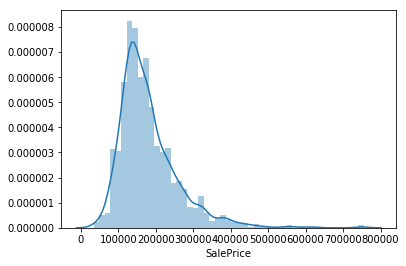

In [62]:
# SalePrice is the obvious candidate for a log transformed y variable, so I'll graph it then transform it

feature = 'GrLivArea'
# dfc.columns.tolist().remove('SalePrice')
target = 'SalePrice'

sns.distplot(df_coded[target]);

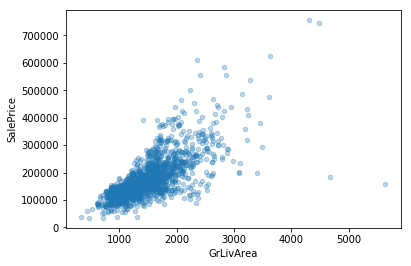

In [63]:
df_coded.plot(x=feature, y=target, kind='scatter', alpha = 0.3);
# I see a slight curve down here, so let's try a log

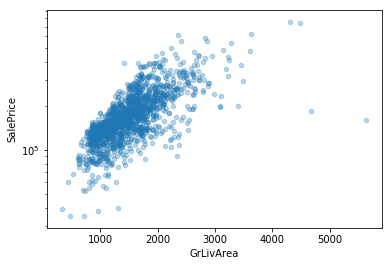

In [64]:
df_coded.plot(x=feature, y=target, kind='scatter', alpha = 0.3, logy=True);

R^2:  0.491298172247


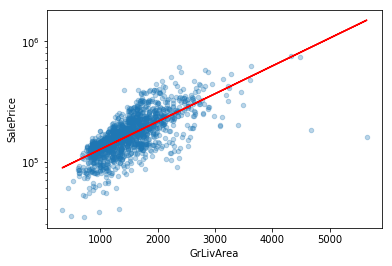

In [65]:
# I'll try OLS regressing this guy:
ax = df.plot(x=feature, y=target, kind='scatter', alpha = 0.3, logy=True);

X = df[[feature]]
y = np.log(df[target]) #log the target variable

# define and fit model
model = LinearRegression()
model.fit(X,y)

# generate a predivtive line
y_pred = np.exp(model.predict(X)) #must apply inverse log

ax.plot(X,y_pred, color='red')
print('R^2: ', model.score(X,y))
# print('RMSE: ' (np.sqrt(mean_squared_error(y_test, y_pred))))


# Encode all categorical variables

In [66]:
# this is a dataset where all cats are endcoded, thanks Daniel!
df_coded=dfc.copy()
for col in df_coded.columns:
  if df_coded[col].dtype=='O':
    df_coded[col] = pd.Categorical(df_coded[col])
    df_coded[col] = df_coded[col].cat.codes

In [79]:
# resolve a float64 error with Linear Regression
df_coded = df_coded.fillna(value=0)
for col in df_coded.columns:
  if df_coded[col].dtype=='float64':
    df_coded[col] = (df_coded[col]).astype(np.int64)

In [80]:
df_coded.dtypes

MSSubClass       int64
MSZoning          int8
LotFrontage      int64
LotArea          int64
Street            int8
Alley             int8
LotShape          int8
LandContour       int8
Utilities         int8
LotConfig         int8
LandSlope         int8
Neighborhood      int8
Condition1        int8
Condition2        int8
BldgType          int8
HouseStyle        int8
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
RoofStyle         int8
RoofMatl          int8
Exterior1st       int8
Exterior2nd       int8
MasVnrType        int8
MasVnrArea       int64
ExterQual         int8
ExterCond         int8
Foundation        int8
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
Heating           int8
HeatingQC         int8
CentralAir        int8
Electrical        int8
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath   

In [81]:
df_coded.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65,8450,1,0,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196,2,4,2,706,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,548,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80,9600,1,0,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0,3,4,1,978,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,2,460,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68,11250,1,0,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162,2,4,2,486,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,2,608,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60,9550,1,0,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0,3,4,0,216,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,3,642,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84,14260,1,0,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350,2,4,2,655,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,3,836,2,192,84,0,0,0,0,0,12,2008,8,4,250000


# Establish a baseline R^2 with all non engineered categories

In [82]:
# now that I haveone sucessful regression, I'll add features and do TTS


# define features and target
features = df_coded.columns.drop(['SalePrice'])
target = 'SalePrice'

y = df_coded[target]
X = df_coded[features]

def run_linear_model(X, y):
    # Split into test and train data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

    # Fit model using train data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions using test features
    y_pred = model.predict(X_test)

    # Compare predictions to test target
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)

    print('Root Mean Squared Error', rmse)
    print('R^2 Score', r2)
    print('Intercept', model.intercept_)
    coefficients = pd.Series(model.coef_, X_train.columns)
    print(coefficients.to_string())
    
run_linear_model(X, y)


Root Mean Squared Error 34068.6814136
R^2 Score 0.848679831612
Intercept 1447806.90041
MSSubClass         -97.477145
MSZoning         -1321.000005
LotFrontage        -29.608827
LotArea              0.267816
Street           18498.649943
Alley            -4269.654242
LotShape         -1158.149446
LandContour       2935.178857
Utilities       -56390.952135
LotConfig          358.361367
LandSlope        14627.351816
Neighborhood       494.419763
Condition1        -311.224360
Condition2      -10473.290025
BldgType         -2259.743579
HouseStyle       -1075.988684
OverallQual      13169.312577
OverallCond       4017.647957
YearBuilt          250.234680
YearRemodAdd        92.552636
RoofStyle         2348.567237
RoofMatl          3298.874783
Exterior1st       -990.886157
Exterior2nd        441.041928
MasVnrType        5026.978004
MasVnrArea          25.825482
ExterQual        -9186.162073
ExterCond          669.252968
Foundation        1274.319196
BsmtFinSF1           5.758890
BsmtFinSF2   

# Create two polynomial features

My base model scores are:

Root Mean Squared Error 34068.6814136
R^2 Score 0.848679831612

So I will try to improve upon these scores while creating features.

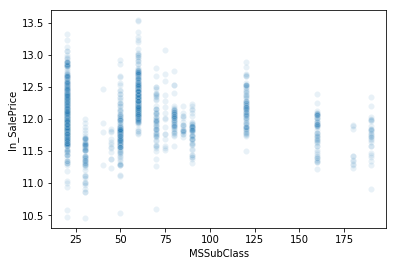

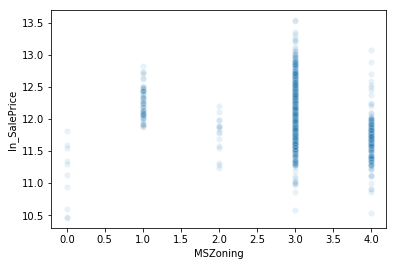

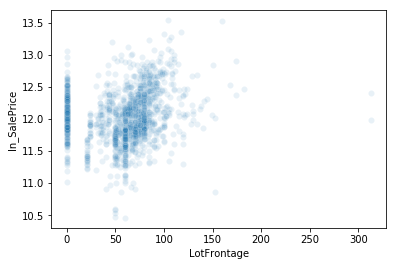

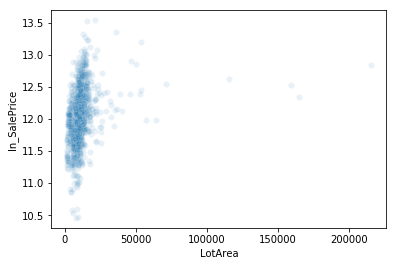

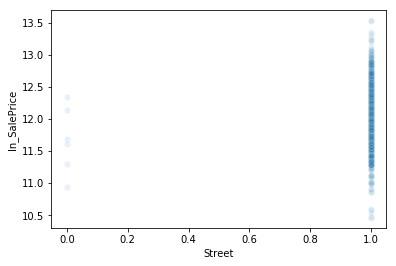

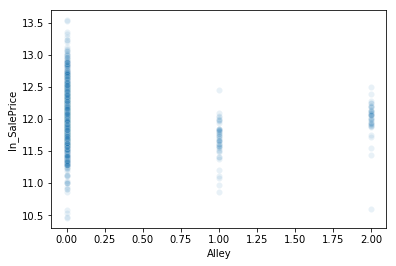

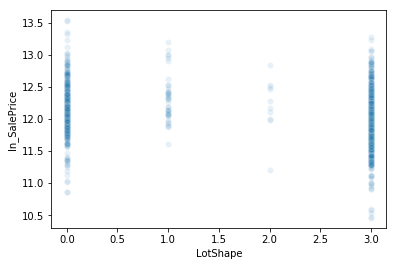

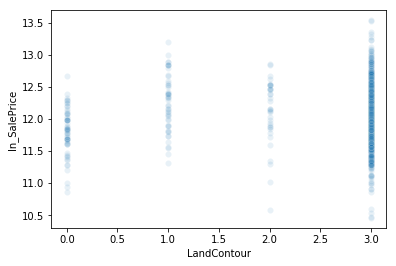

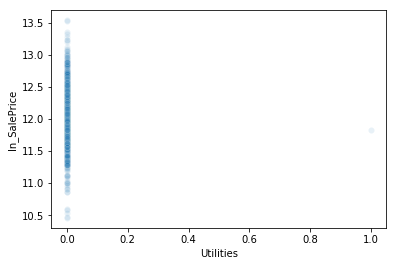

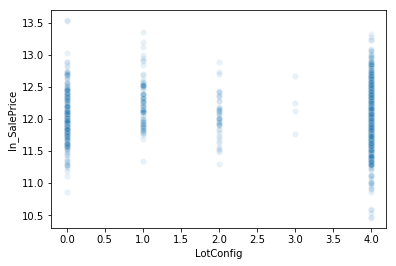

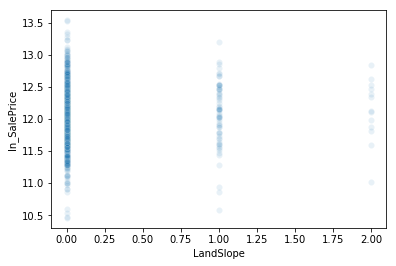

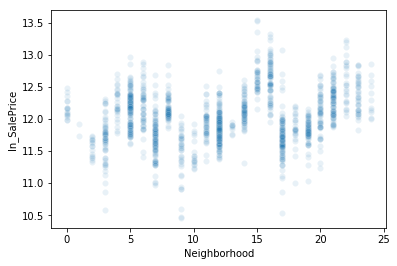

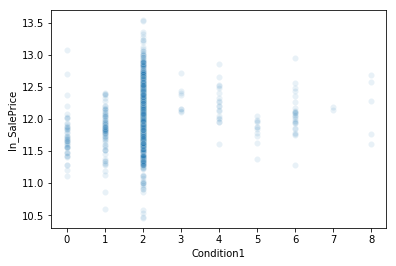

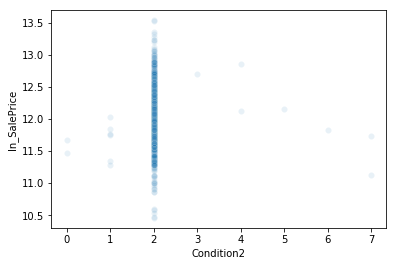

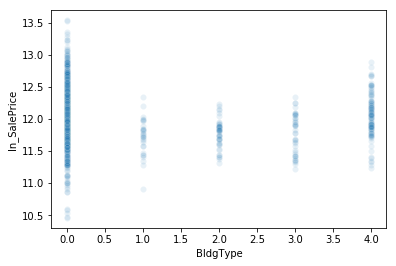

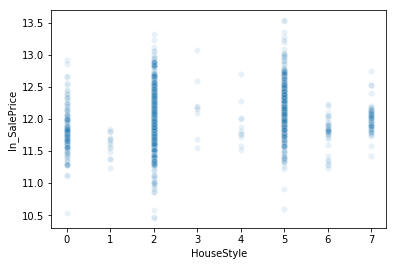

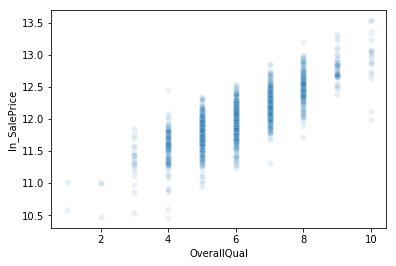

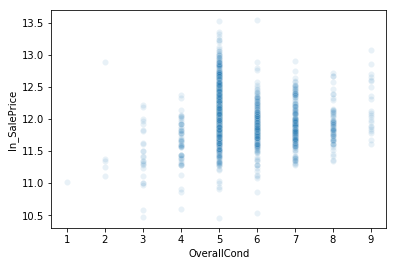

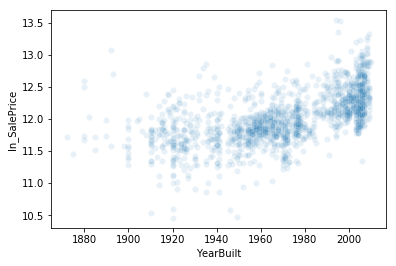

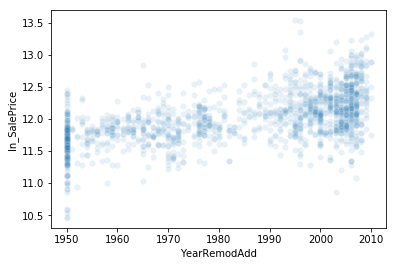

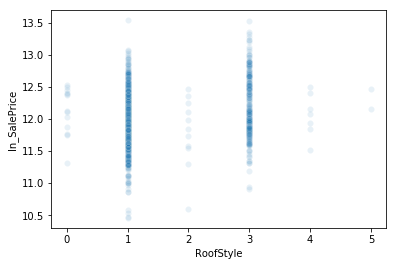

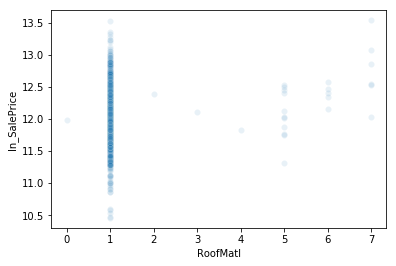

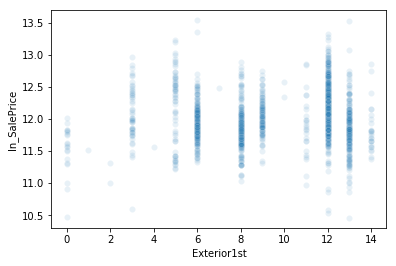

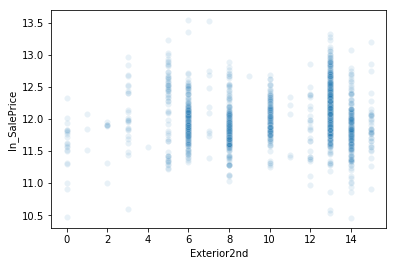

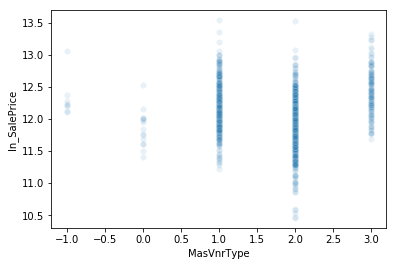

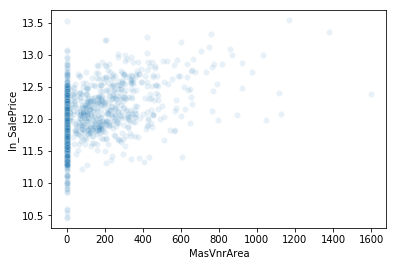

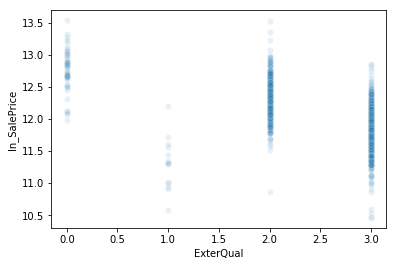

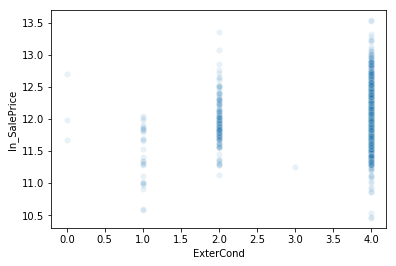

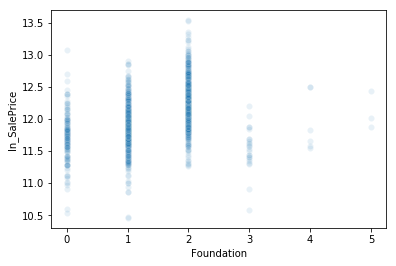

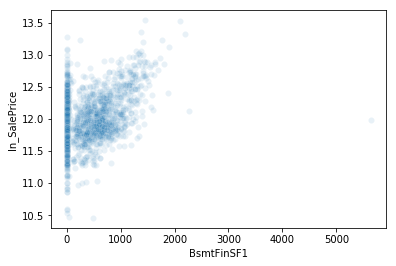

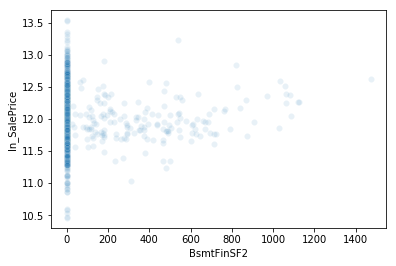

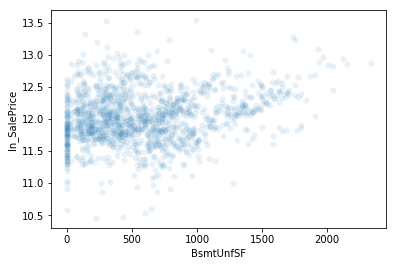

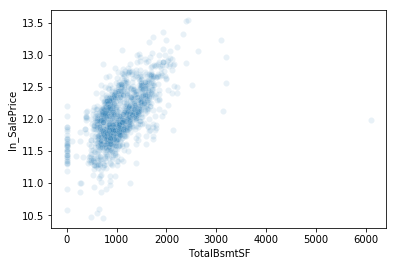

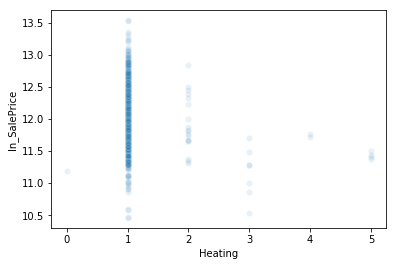

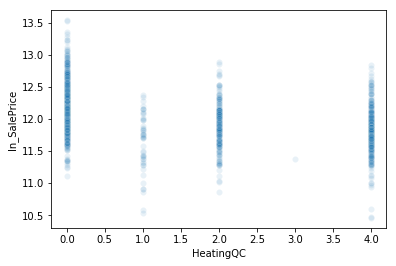

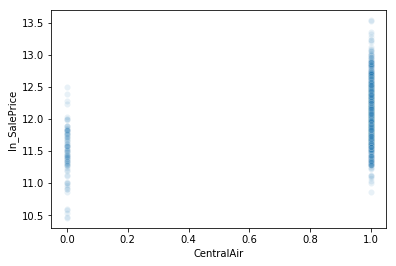

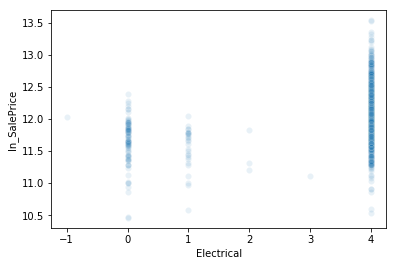

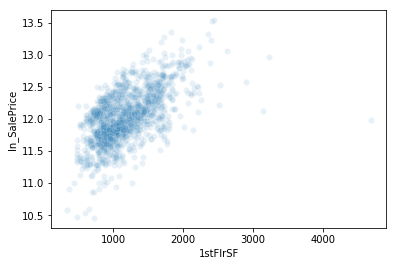

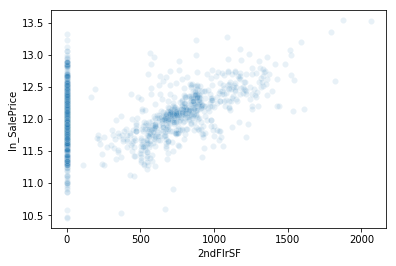

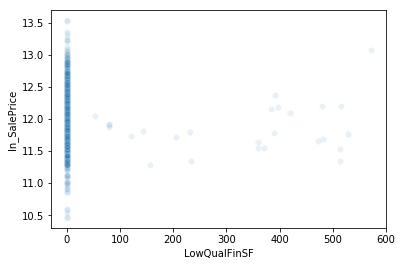

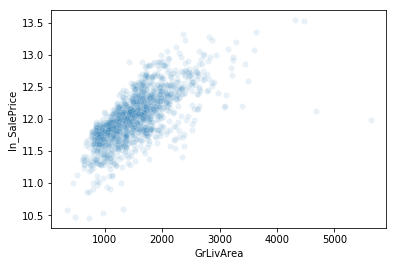

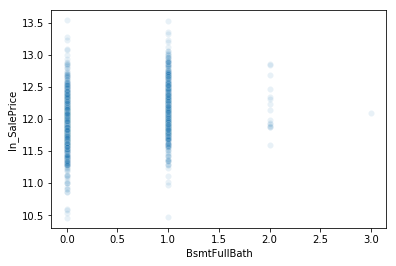

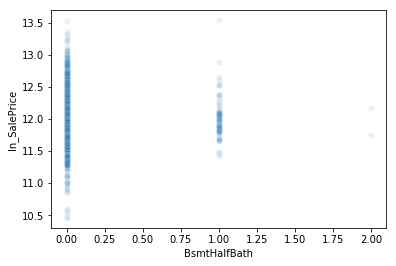

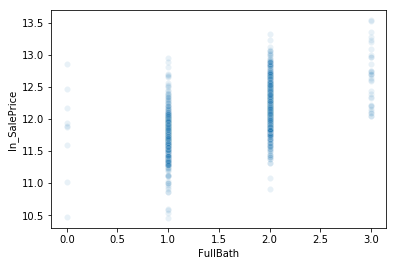

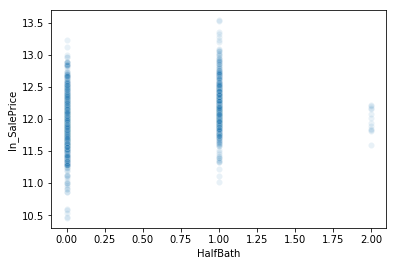

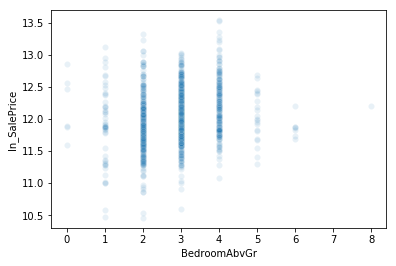

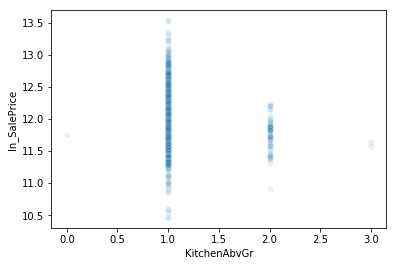

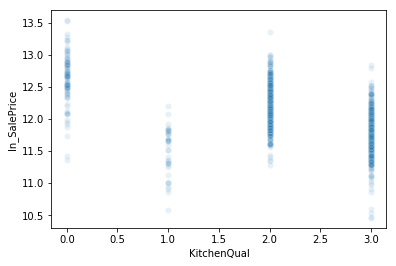

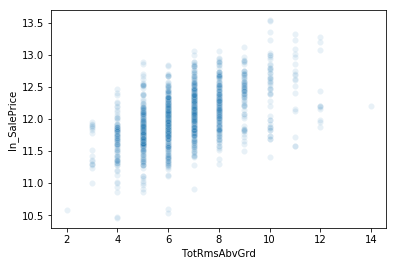

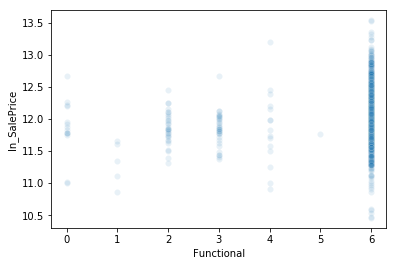

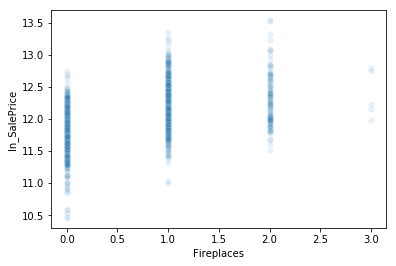

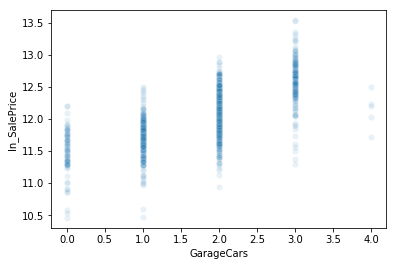

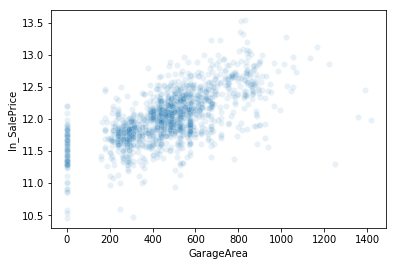

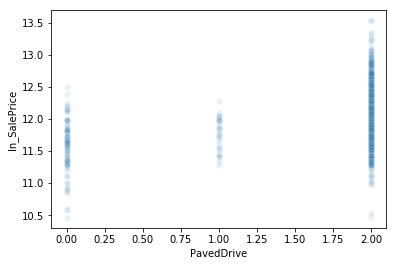

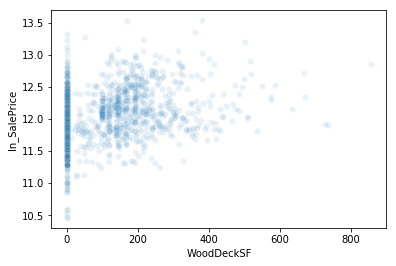

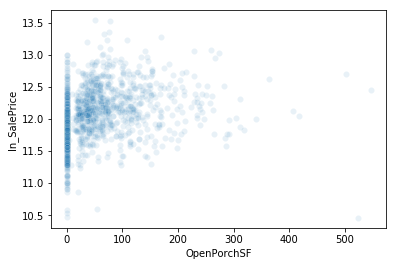

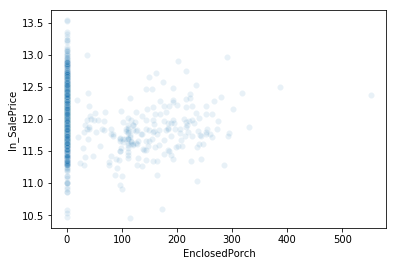

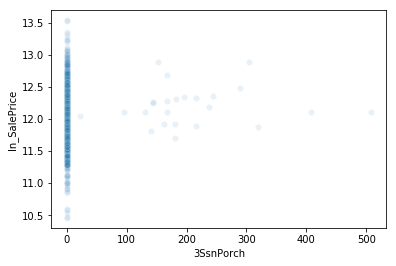

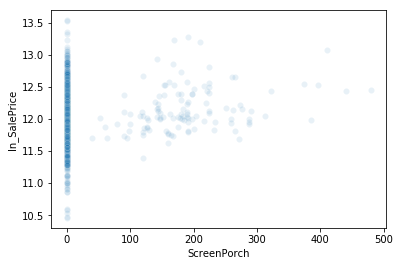

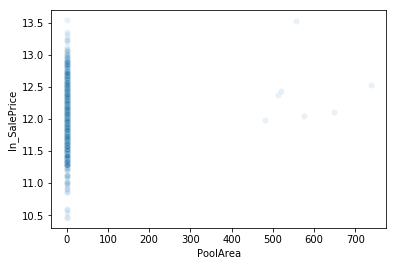

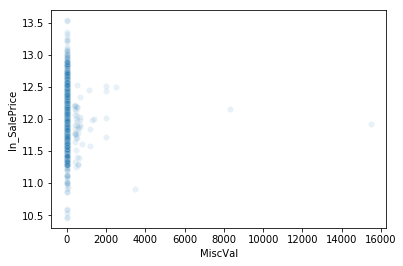

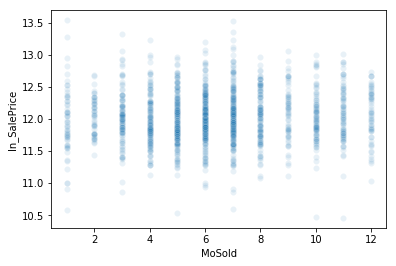

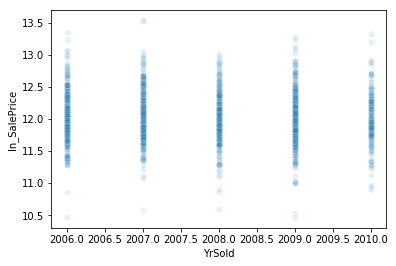

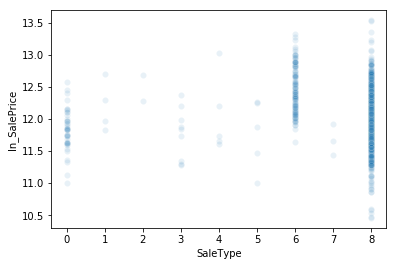

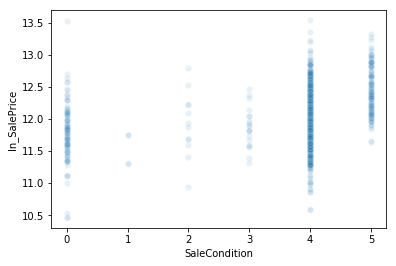

In [84]:
# I'm going to try to identify a likely candidate for a polynomial feature:

# add log sales as a feature
df_coded['ln_SalePrice'] = np.log(df_coded['SalePrice'])

target = 'ln_SalePrice'
numeric_columns = df_coded.select_dtypes(include='number').columns
for feature in numeric_columns.drop([target, 'SalePrice']):
    sns.scatterplot(x=feature, y=target, data=df_coded, alpha=0.1)
    plt.show()
    

In [85]:
# first I'm going to engineer a number to represent year since remodelled

df_coded['Remod_Age'] = df_coded['YrSold'] - df_coded['YearRemodAdd']

# and create a polynomial remod_age feature to account for depreciation

df_coded['Remod_Age_squared'] = df_coded['Remod_Age'] ** 2

# I will also add a total sqf and a polynomial companion variable
df_coded['Total_SF'] = df_coded['TotalBsmtSF'] + df_coded['GrLivArea']

df_coded['Total_SF_squared'] = df_coded['Total_SF']**2

# total porch and a polynomial companion variable
df_coded['all_porch'] = df_coded['WoodDeckSF']+ df_coded['OpenPorchSF'] + df_coded['EnclosedPorch'] + df_coded['ScreenPorch']

df_coded['all_porch_squared'] = df_coded['all_porch']**2


In [87]:
# now let's test our new model score:

# define features and target
features = df_coded.columns.drop([target, 'SalePrice'])
target = 'ln_SalePrice'

y = df_coded[target]
X = df_coded[features]

run_linear_model(X,y)

Root Mean Squared Error 0.137945492814
R^2 Score 0.89803011504
Intercept 15.7648799893
MSSubClass          -1.156594e-04
MSZoning            -1.942326e-02
LotFrontage          8.826819e-06
LotArea              1.885726e-06
Street               6.817036e-02
Alley                6.928111e-03
LotShape            -3.470875e-03
LandContour         -6.270416e-03
Utilities           -1.573172e-01
LotConfig           -1.250269e-03
LandSlope            1.139549e-02
Neighborhood        -5.027682e-06
Condition1           1.547879e-03
Condition2          -3.266010e-02
BldgType            -1.094410e-02
HouseStyle           2.973434e-03
OverallQual          5.649693e-02
OverallCond          4.332955e-02
YearBuilt            1.965217e-03
YearRemodAdd        -9.899260e-04
RoofStyle            4.196284e-03
RoofMatl             8.065427e-03
Exterior1st         -6.319102e-03
Exterior2nd          4.357605e-03
MasVnrType           1.904388e-02
MasVnrArea           3.623488e-05
ExterQual           -1.931531

# Create an ineraction feature


In [88]:
df_coded['Average_room_sqft'] = df_coded['Total_SF'] / (df_coded['BsmtFullBath'] + df_coded['BsmtHalfBath'] +
                                                       df_coded['BedroomAbvGr'] + df_coded['FullBath'] + 
                                                       df_coded['HalfBath'])

In [90]:
# now let's test our new model score:

# define features and target
features = df_coded.columns.drop([target, 'SalePrice'])
target = 'ln_SalePrice'

y = df_coded[target]
X = df_coded[features]

run_linear_model(X,y)

Root Mean Squared Error 0.137523323736
R^2 Score 0.898653298277
Intercept 15.8218843223
MSSubClass          -1.208519e-04
MSZoning            -1.965038e-02
LotFrontage          7.938399e-06
LotArea              1.898243e-06
Street               7.016344e-02
Alley                6.708670e-03
LotShape            -3.679899e-03
LandContour         -6.267024e-03
Utilities           -1.583915e-01
LotConfig           -1.236652e-03
LandSlope            1.038579e-02
Neighborhood        -2.283102e-05
Condition1           1.585406e-03
Condition2          -3.388538e-02
BldgType            -1.036194e-02
HouseStyle           2.905990e-03
OverallQual          5.648189e-02
OverallCond          4.297059e-02
YearBuilt            1.947718e-03
YearRemodAdd        -9.774876e-04
RoofStyle            4.135804e-03
RoofMatl             8.757227e-03
Exterior1st         -6.275220e-03
Exterior2nd          4.387654e-03
MasVnrType           1.850236e-02
MasVnrArea           3.267454e-05
ExterQual           -1.92336

# Add additional features

Our interaction feature added some minor gains:
Root Mean Squared Error 0.137523323736
R^2 Score 0.898653298277

vs

Root Mean Squared Error 0.137945492814
R^2 Score 0.89803011504


I will now try to PCA to reduce dimensionallity in this dataset.

# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data